# Preamble and data entry

CSV file pulled from Kenneth French' Data Library: http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html

In [101]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import plotly
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy.stats import f

# Part 1

*Select one set of 25 double-sorted portfolios from this data library. Restrict yourself to the US part. Motivate your choice. Note that with a set of double sorted portfolios, you can make tables as in Fama and French (2015, 2016).*

In [102]:
df = pd.read_csv('/Users/sebastian/Library/CloudStorage/OneDrive-ErasmusUniversityRotterdam/Asset Pricing (QF variant)/Assignment/rates and 25 portfolios.csv')

# Part 2

*Use the prescribed sample period, and transform the portfolio returns to excess returns (use the risk-free rate series available on Canvas). Analyze the excess returns of your portfolios and the market portfolio (also available on Canvas). Pay attention to the means, variances and correlations.*

In [103]:
returns = df.drop(['Date', 'Mkt-RF','SMB', 'HML','RF'], axis = 1)
RF = df['RF']
excess_r = returns.sub(RF, axis = 0)
excess_r.insert(0, 'Mkt-RF', df['Mkt-RF'])
excess_r

,Mkt-RF,SMALL LoOP,ME1 OP2,ME1 OP3,ME1 OP4,SMALL HiOP,ME2 OP1,ME2 OP2,ME2 OP3,ME2 OP4,...,ME4 OP1,ME4 OP2,ME4 OP3,ME4 OP4,ME4 OP5,BIG LoOP,ME5 OP2,ME5 OP3,ME5 OP4,BIG HiOP
0,5.07,2.1156,3.7755,2.2127,2.4165,3.9442,6.2611,5.6192,3.5909,4.6416,...,5.1881,5.0984,6.1704,4.1789,6.3483,4.6072,4.0366,5.0568,5.4446,5.7335
1,-1.57,-1.6683,-1.1418,-2.2106,3.9866,-1.6451,-2.1080,-2.0295,-0.1886,-2.3756,...,-2.0507,-1.3464,-2.4774,-2.9323,-2.5775,-2.7048,-2.5449,0.6266,-2.0903,-1.5076
2,2.53,-0.0231,-1.2285,1.0185,2.8659,0.1055,3.3292,2.8451,0.9995,-1.5566,...,2.7627,0.1581,1.4836,-0.9554,2.7501,-0.3158,-0.1349,2.1151,2.8620,7.4894
3,-0.85,-2.4455,-1.6830,-3.6443,-2.5783,-3.4025,-1.6037,-0.4568,-0.3451,-1.3951,...,-0.3735,-1.3195,-0.3328,-0.7544,0.3825,-1.2622,-1.4021,0.9881,0.4743,-3.0411
4,1.83,-1.5211,-1.0549,-0.9981,-0.6973,-2.5110,-0.4887,-0.5148,-0.0633,-0.8984,...,3.3816,1.2021,0.2105,1.1415,-1.1095,-0.1096,4.1830,1.2723,2.6835,1.7883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683,5.77,4.6330,-4.2672,0.4996,-4.3471,4.5059,2.3184,1.4775,3.2681,2.9712,...,6.7017,4.2086,5.2906,6.6086,4.4506,7.1284,8.1318,5.0268,5.9207,6.3113
684,7.63,2.0616,6.1977,8.5967,8.3505,12.7032,5.7024,5.0159,4.1486,9.8749,...,3.0406,2.8969,2.6200,6.0138,5.8809,8.0561,9.4999,4.4452,5.7815,10.1560
685,-3.63,-0.9945,-5.2910,-5.5324,1.7767,-4.4345,-3.1746,-6.0722,-4.4135,-5.4366,...,1.0810,-4.2200,-2.5207,-1.3890,-2.3882,-1.8656,-5.3641,-4.8539,-3.0551,-4.1600
686,-2.10,-2.6162,5.2978,4.1051,1.2639,-0.3502,0.2038,5.4107,6.6397,3.9842,...,3.7226,0.9427,2.5561,1.7143,-0.9508,-2.3640,-2.5898,0.3504,-1.2289,-4.6130


### Mean, variance and correlation of excess returns = returns - r_f

In [104]:
retmean = excess_r.mean()
retvar = excess_r.var()
retvar

Mkt-RF        19.996840
SMALL LoOP    53.668469
ME1 OP2       35.048646
ME1 OP3       32.466524
ME1 OP4       35.582672
SMALL HiOP    47.181868
ME2 OP1       49.205229
ME2 OP2       33.312622
ME2 OP3       28.774343
ME2 OP4       32.659747
ME2 OP5       41.513227
ME3 OP1       43.695118
ME3 OP2       27.401608
ME3 OP3       25.605575
ME3 OP4       28.584980
ME3 OP5       35.895783
ME4 OP1       37.553283
ME4 OP2       26.630297
ME4 OP3       23.525327
ME4 OP4       24.954700
ME4 OP5       29.150337
BIG LoOP      30.078594
ME5 OP2       21.343405
ME5 OP3       19.874827
ME5 OP4       19.119012
BIG HiOP      19.244189
dtype: float64

In [105]:
retvar = retvar.to_frame
retcorr = excess_r.corr()

# Part 3

*Construct and graph the mean-variance frontier based on your portfolios and the market portfolio, when a riskless asset is not available. For these calculations, you need average gross returns, which you should construct by adding the risk-free rate to the means of the excess returns that you calculated before. You can set the risk-free rate equal to R_f = 0.15% per month. What does the global minimum variance portfolio (π_gmv) look like (see also Back, 2017, Ch. 5)? And the other portfolio (π_mu)?*

## Average gross return (Expected returns)

In [106]:
rf15 = 0.15
av_gross_r = retmean + rf15
excess_rrf15 = excess_r + rf15
excess_rrf15

,Mkt-RF,SMALL LoOP,ME1 OP2,ME1 OP3,ME1 OP4,SMALL HiOP,ME2 OP1,ME2 OP2,ME2 OP3,ME2 OP4,...,ME4 OP1,ME4 OP2,ME4 OP3,ME4 OP4,ME4 OP5,BIG LoOP,ME5 OP2,ME5 OP3,ME5 OP4,BIG HiOP
0,5.22,2.2656,3.9255,2.3627,2.5665,4.0942,6.4111,5.7692,3.7409,4.7916,...,5.3381,5.2484,6.3204,4.3289,6.4983,4.7572,4.1866,5.2068,5.5946,5.8835
1,-1.42,-1.5183,-0.9918,-2.0606,4.1366,-1.4951,-1.9580,-1.8795,-0.0386,-2.2256,...,-1.9007,-1.1964,-2.3274,-2.7823,-2.4275,-2.5548,-2.3949,0.7766,-1.9403,-1.3576
2,2.68,0.1269,-1.0785,1.1685,3.0159,0.2555,3.4792,2.9951,1.1495,-1.4066,...,2.9127,0.3081,1.6336,-0.8054,2.9001,-0.1658,0.0151,2.2651,3.0120,7.6394
3,-0.70,-2.2955,-1.5330,-3.4943,-2.4283,-3.2525,-1.4537,-0.3068,-0.1951,-1.2451,...,-0.2235,-1.1695,-0.1828,-0.6044,0.5325,-1.1122,-1.2521,1.1381,0.6243,-2.8911
4,1.98,-1.3711,-0.9049,-0.8481,-0.5473,-2.3610,-0.3387,-0.3648,0.0867,-0.7484,...,3.5316,1.3521,0.3605,1.2915,-0.9595,0.0404,4.3330,1.4223,2.8335,1.9383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683,5.92,4.7830,-4.1172,0.6496,-4.1971,4.6559,2.4684,1.6275,3.4181,3.1212,...,6.8517,4.3586,5.4406,6.7586,4.6006,7.2784,8.2818,5.1768,6.0707,6.4613
684,7.78,2.2116,6.3477,8.7467,8.5005,12.8532,5.8524,5.1659,4.2986,10.0249,...,3.1906,3.0469,2.7700,6.1638,6.0309,8.2061,9.6499,4.5952,5.9315,10.3060
685,-3.48,-0.8445,-5.1410,-5.3824,1.9267,-4.2845,-3.0246,-5.9222,-4.2635,-5.2866,...,1.2310,-4.0700,-2.3707,-1.2390,-2.2382,-1.7156,-5.2141,-4.7039,-2.9051,-4.0100
686,-1.95,-2.4662,5.4478,4.2551,1.4139,-0.2002,0.3538,5.5607,6.7897,4.1342,...,3.8726,1.0927,2.7061,1.8643,-0.8008,-2.2140,-2.4398,0.5004,-1.0789,-4.4630


### Variance-covariance matrix

In [107]:
covmat = excess_rrf15.cov()
covmat = covmat.to_numpy()

### Standard deviation

Volatility this variance contains also for the market portfolio

In [108]:
variancerf15 = excess_rrf15.var()
vol = (variancerf15)**(1/2)
vol

Mkt-RF        4.471783
SMALL LoOP    7.325877
ME1 OP2       5.920190
ME1 OP3       5.697940
ME1 OP4       5.965121
SMALL HiOP    6.868906
ME2 OP1       7.014644
ME2 OP2       5.771709
ME2 OP3       5.364172
ME2 OP4       5.714871
ME2 OP5       6.443076
ME3 OP1       6.610228
ME3 OP2       5.234654
ME3 OP3       5.060195
ME3 OP4       5.346492
ME3 OP5       5.991309
ME4 OP1       6.128073
ME4 OP2       5.160455
ME4 OP3       4.850291
ME4 OP4       4.995468
ME4 OP5       5.399105
BIG LoOP      5.484395
ME5 OP2       4.619892
ME5 OP3       4.458119
ME5 OP4       4.372529
BIG HiOP      4.386820
dtype: float64

### A, B, C calculation

In [109]:
A = np.matmul(np.matmul(np.transpose(av_gross_r), np.linalg.inv(covmat)), av_gross_r)
B = np.matmul(np.matmul(np.transpose(av_gross_r), np.linalg.inv(covmat)), np.ones(26))
C = np.matmul(np.transpose(np.ones(26)), np.matmul(np.linalg.inv(covmat), np.ones(26)))

### GMV portfolio

In [110]:
pi_gmv = (1 / C)*np.matmul(np.linalg.inv(covmat), np.ones(26))
mu_gmv = B / C
var_gmv = 1 / C
vol_gmv = var_gmv**(1 / 2)

### Mu portfolio

In [111]:
pi_mu = (1 / B)*np.matmul(np.linalg.inv(covmat), av_gross_r)
mu_mu = np.matmul(np.transpose(av_gross_r), pi_mu)
var_mu = np.matmul(np.transpose(pi_mu), np.matmul(covmat, pi_mu))
vol_mu = var_mu**(1 / 2)

## Efficient Frontier

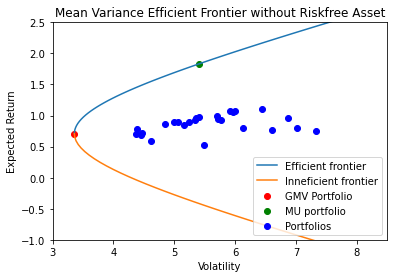

In [112]:
#y = av_gross_r
#x = ((A - 2*B*y + C*y**2)/(A*C - B**2))**(1 / 2)
y = np.linspace(0.71, 4, 100)
x = ((A - 2*B*y + C*y**2) / (A*C - B**2))**(1 / 2)
plt.plot(x, y, label = 'Efficient frontier')
y = np.linspace(0.708, -5, 100)
x = ((A - 2*B*y + C*y**2) / (A*C - B**2))**(1 / 2)

plt.axis([3, 8.5, -1, 2.5])
plt.plot(x, y, label = 'Inneficient frontier')
plt.scatter(vol_gmv, mu_gmv, c = 'red', label = 'GMV Portfolio')
plt.scatter(vol_mu, mu_mu, c = 'green', label = 'MU portfolio')
plt.scatter(vol, av_gross_r, c = 'blue', label = 'Portfolios')
plt.title('Mean Variance Efficient Frontier without Riskfree Asset')
plt.xlabel("Volatility")
plt.ylabel("Expected Return")
plt.legend(loc = "lower right")
plt.show() 

# Part 4

*From now on, assume that a riskless asset is available (again with the risk-free rate equal to 0.15%). Calculate the tangency portfolio, and discuss its properties. Add the mean-variance frontier with a riskless asset (cf. Figures 5.3 in Back, 2017) to the previous graph. Also include the market portfolio in your graph. Discuss what you conclude from it.*

### Tangent Portfolio

In [113]:
mu_e = retmean
pi_tang = (1 / np.matmul(np.transpose(np.ones(26)), np.matmul(np.linalg.inv(covmat), mu_e)))*np.matmul(np.linalg.inv(covmat), mu_e)
mu_e_tang = (1 / np.matmul(np.transpose(np.ones(26)), np.matmul(np.linalg.inv(covmat), mu_e)))*np.matmul(np.transpose(mu_e), np.matmul(np.linalg.inv(covmat), mu_e))
var_tang = np.matmul(np.transpose(pi_tang), np.matmul(covmat, pi_tang))
vol_tang = var_tang**(1 / 2)
mu_tang = np.matmul(np.transpose(av_gross_r), pi_tang)

### Graph including μ_tang and slope 

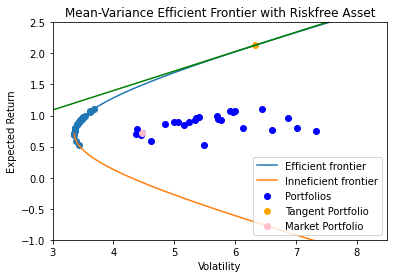

In [114]:
y = av_gross_r
x = ((A - 2*B*y + C*y**2) / (A*C - B**2))**(1 / 2)
plt.scatter(x, y)

y = np.linspace(0.71, 4, 100)
x = ((A - 2*B*y + C*y**2) / (A*C - B**2))**(1 / 2)
plt.plot(x, y, label = 'Efficient frontier')

y = np.linspace(0.708, -5, 100)
x = ((A - 2*B*y + C*y**2)/(A*C - B**2))**(1 / 2)
plt.axis([3, 8.5, -1, 2.5])
plt.plot(x, y, label = 'Inneficient frontier')
plt.scatter(vol, av_gross_r, c = 'blue', label = 'Portfolios')
plt.scatter(vol_tang, mu_tang, c = 'orange',label = 'Tangent Portfolio')
plt.scatter(4.471783, 0.713270, c = 'pink', label = 'Market Portfolio')

x = np.linspace(0, 7.8, 100)
y = 0.15 + ((mu_tang - 0.15) / (vol_tang))*x
plt.plot(x, y, color = 'green')
plt.title('Mean-Variance Efficient Frontier with Riskfree Asset')
plt.xlabel("Volatility")
plt.ylabel("Expected Return")
plt.legend(loc = "lower right")
plt.show() 

# Part 5

*Regress the excess returns of the portfolios on the excess market returns and a constant. Present and discuss the regression coefficients and their standard errors.*

### Excess market returns without market returns and markets returns separately

In [115]:
excess_r = excess_r.to_numpy()
excess_m = df[["Mkt-RF"]]
excess_R = np.delete(excess_r, 0, 1)
excess_m = excess_m.to_numpy()
excess_m = excess_m.reshape(-1, 1)

### Extracting each column of excess_R

In [116]:
excess_m = df[["Mkt-RF"]]
excess_m = excess_m.to_numpy()
X = excess_m
X = sm.add_constant(X)

### Creating matrices for GRS test

$E$ is the matrix of residuals, $a$ is the empty vector to be filled with the intercepts

In [117]:
E = np.zeros((688, 25))
a = np.zeros((25, 1))

#column wise regression of excess returns on a and excess market returns
for col in range(excess_R.shape[1]):
    model = sm.OLS(excess_R[:, col], X)
    results = model.fit()
    print(results.summary()) #
    #print(results.bse) #st
    #print(results.df_resid)#degrees of freedom
    print(results.params) #intercept and beta
    #print(results.resid)
    E[:, col] = results.resid 
    a[col] = results.params[0]

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     1104.
Date:                Tue, 13 Sep 2022   Prob (F-statistic):          5.56e-145
Time:                        15:56:26   Log-Likelihood:                -2016.0
No. Observations:                 688   AIC:                             4036.
Df Residuals:                     686   BIC:                             4045.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1306      0.174     -0.749      0.4

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     4485.
Date:                Tue, 13 Sep 2022   Prob (F-statistic):          4.16e-303
Time:                        15:56:26   Log-Likelihood:                -1409.9
No. Observations:                 688   AIC:                             2824.
Df Residuals:                     686   BIC:                             2833.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0903      0.072      1.249      0.2

### Sigma to calculate GRS

In [ ]:
S_hat = (np.matmul(np.transpose(E),E)) / 686
S_hat.shape

### Calculate $q_{11}$ from $(K'K)^{-1}$ for GRS

In [ ]:
K = np.concatenate((np.ones((688, 1)), excess_m), axis=1)
Q = np.linalg.inv(np.matmul(np.transpose(K), K))
q11 = Q[0,0]

# Part 6

*Conduct the GRS-test and interpret its outcome in relation to the CAPM.*

In [80]:
z = ((688 - 25 - 1) / (25*q11*(686)))*(np.matmul(np.transpose(a), np.matmul(np.linalg.inv(S_hat), a)))
z

array([[2.14508297]])

### F test to reject 25, 688-25-1

In [81]:
p = 1 - f.cdf(z, 25, 662)
if p <= 0.05:
    print("We reject Ho: a = 0 meaning that CAPM doesnt hold for a 5% significance level")
else:
        print("CAPM might hold for a 5% significance level")
        
if p<=0.025:
    print("We reject Ho: a = 0 meaning that CAPM doesnt hold for a 2.5% significance level")
else:
    print("CAPM might hold for a 2.5% significance level")      
        
if p <= 0.01:
    print("We reject Ho: a = 0 meaning that CAPM doesnt hold for a 1% significance level")
else:
        print("CAPM might hold for a 1% significance level")

We reject Ho: a = 0 meaning that CAPM doesnt hold for a 5% significance level
We reject Ho: a = 0 meaning that CAPM doesnt hold for a 2.5% significance level
We reject Ho: a = 0 meaning that CAPM doesnt hold for a 1% significance level


# Part 7

*Explain what the GRS-test means for efficiency of the market portfolio (Sharpe ratios!). Relate it to the picture of question 5. How realistic is this result? What is you conclusion regarding the efficiency of the market?*

In [84]:
sharpe = av_gross_r / vol
sharpe

Mkt-RF        0.159505
SMALL LoOP    0.101570
ME1 OP2       0.182404
ME1 OP3       0.174782
ME1 OP4       0.177889
SMALL HiOP    0.140218
ME2 OP1       0.113143
ME2 OP2       0.161922
ME2 OP3       0.178275
ME2 OP4       0.166281
ME2 OP5       0.171201
ME3 OP1       0.115435
ME3 OP2       0.169777
ME3 OP3       0.177399
ME3 OP4       0.173533
ME3 OP5       0.178313
ME4 OP1       0.129565
ME4 OP2       0.163872
ME4 OP3       0.178010
ME4 OP4       0.179007
ME4 OP5       0.180807
BIG LoOP      0.095383
ME5 OP2       0.126527
ME5 OP3       0.152303
ME5 OP4       0.161160
BIG HiOP      0.177359
dtype: float64